In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [35]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df.drop("customerID", axis=1, inplace=True)                       # Drop customer ID as it isn't useful for prediction
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})                #Convert target variable to binary


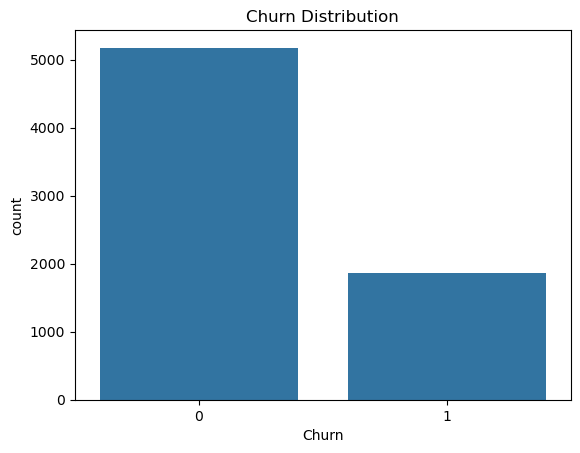

In [39]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [40]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [41]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
len(y_prob_log)


1409

In [45]:
coeff = pd.Series( log_model.coef_[0], index=X.columns).sort_values(ascending=False)
coeff

InternetService_Fiber optic              0.778760
TotalCharges                             0.497246
StreamingMovies_Yes                      0.258653
StreamingTV_Yes                          0.258042
MultipleLines_Yes                        0.216356
PaperlessBilling_Yes                     0.181833
PaymentMethod_Electronic check           0.181456
DeviceProtection_Yes                     0.053625
SeniorCitizen                            0.052901
PaymentMethod_Mailed check               0.033133
gender_Male                              0.011110
Partner_Yes                              0.010629
PhoneService_Yes                         0.007680
MultipleLines_No phone service          -0.007680
OnlineBackup_Yes                        -0.011605
PaymentMethod_Credit card (automatic)   -0.012830
OnlineBackup_No internet service        -0.092861
StreamingTV_No internet service         -0.092861
InternetService_No                      -0.092861
OnlineSecurity_No internet service      -0.092861


In [46]:
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8415846443979436


Using Random forest for more accurate prediction:

In [47]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
len(y_prob_rf)

1409

In [48]:
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC: 0.8432263814616756


In [49]:
threshold = 0.35
y_pred_custom = (y_prob_rf >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [50]:
feature_importance = pd.Series( rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance.head(10)


tenure                            0.181290
TotalCharges                      0.163687
MonthlyCharges                    0.120182
InternetService_Fiber optic       0.068193
Contract_Two year                 0.059945
PaymentMethod_Electronic check    0.059084
Contract_One year                 0.034928
OnlineSecurity_Yes                0.034836
TechSupport_Yes                   0.024977
PaperlessBilling_Yes              0.022025
dtype: float64

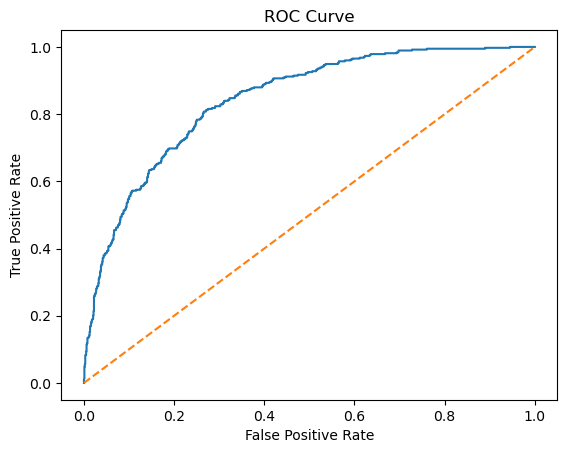

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [52]:
results = X_test.copy()
results["Churn_Probability"] = y_prob_rf
results["Actual_Churn"] = y_test.values
results["Risk_Segment"] = pd.cut( results["Churn_Probability"], bins=[0, 0.3, 0.6, 1], labels=["Low Risk", "Medium Risk", "High Risk"])
results.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Actual_Churn,Risk_Segment
437,0,72,114.05,8468.20,True,True,True,True,False,True,...,True,False,True,True,True,False,False,0.015048,0,Low Risk
2280,1,8,100.15,908.55,False,False,False,True,False,True,...,True,False,False,True,True,False,False,0.755382,0,High Risk
2235,0,41,78.35,3211.20,False,True,True,True,False,True,...,False,True,False,True,True,False,False,0.077330,0,Low Risk
4460,0,18,78.20,1468.75,True,True,False,True,False,False,...,False,False,False,False,False,True,False,0.345028,0,Medium Risk
3761,0,72,82.65,5919.35,False,True,False,True,False,True,...,True,False,True,True,True,False,False,0.021211,0,Low Risk


In [53]:
strategy_map = {
    "High Risk": "Personalized discount ",
    "Medium Risk": "In-app nudges",
    "Low Risk": "No action"
}

results["Retention_strategy"] = results["Risk_Segment"].map(strategy_map)
results.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Actual_Churn,Risk_Segment,Retention_strategy
437,0,72,114.05,8468.20,True,True,True,True,False,True,...,False,True,True,True,False,False,0.015048,0,Low Risk,No action
2280,1,8,100.15,908.55,False,False,False,True,False,True,...,False,False,True,True,False,False,0.755382,0,High Risk,Personalized discount
2235,0,41,78.35,3211.20,False,True,True,True,False,True,...,True,False,True,True,False,False,0.077330,0,Low Risk,No action
4460,0,18,78.20,1468.75,True,True,False,True,False,False,...,False,False,False,False,True,False,0.345028,0,Medium Risk,In-app nudges
3761,0,72,82.65,5919.35,False,True,False,True,False,True,...,False,True,True,True,False,False,0.021211,0,Low Risk,No action


So here apart from predicting customer churn, i have also suggested the relevant strategy that can be used to reduce customer churn based on the interpretation of logistic regression.